In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Bigmart Dataset

In [163]:
bigmart_df = pd.read_csv('Bigmart_sales_Train.csv')

In [164]:
bigmart_df.head()   #printing first 5 rows of bigmart data table

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [165]:
bigmart_df.info()               # getting info of different columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [166]:
bigmart_df.shape          #shape of the dataset

(8523, 12)

In [167]:
bigmart_df.columns      # columns of dataset

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Predictors - All the column except ' Item_Outlet_Sales '
## Target - Item_Outlet_Sales

In [168]:
bigmart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## A). Univariate Analysis
### 1. Categorical Variables
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier 
- Outlet_Size 
- Outlet_Location_Type
- Outlet_Type
- Outlet_Establishment_Year

In [169]:
# 1. Item_identifiers
bigmart_df['Item_Identifier'].unique()  #approx all the items have 

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [170]:
item_ident = pd.Series(bigmart_df['Item_Identifier'].unique())
item_ident

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
1554    FDD28
1555    FDU43
1556    NCF55
1557    NCW30
1558    NCW05
Length: 1559, dtype: object

In [171]:
print(len(item_ident))    # number of unique items

1559


###### There are 1559 products to sell !

In [172]:
# 2. Item_Fat_Content
bigmart_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

###### We have to merge 'LF', 'low fat' into 'Low Fat' and 'reg' into 'Regular'

In [173]:
bigmart_df['Item_Fat_Content'].replace(to_replace='LF', value='Low Fat', inplace=True)     # replacing 'LF' by 'Low Fat'
bigmart_df['Item_Fat_Content'].replace(to_replace='low fat', value='Low Fat', inplace=True)# replacing 'low fat' by 'Low Fat'
bigmart_df['Item_Fat_Content'].replace(to_replace='reg', value='Regular', inplace=True)    # replacing 'reg' by 'Regular'

In [174]:
bigmart_df['Item_Fat_Content'].value_counts()       

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

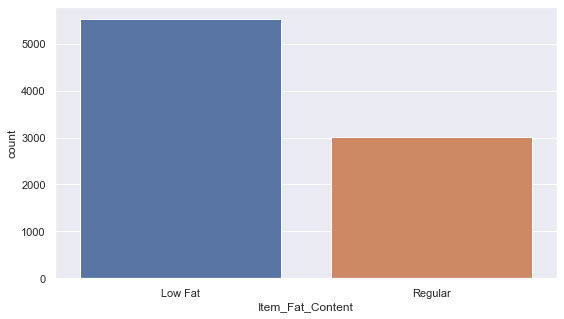

In [175]:
sns.set()
plt.figure(figsize=(9,5))                       # increasing the size of the plot
sns.countplot(bigmart_df['Item_Fat_Content'])

In [176]:
#3. Item_Type
bigmart_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Type', ylabel='count'>

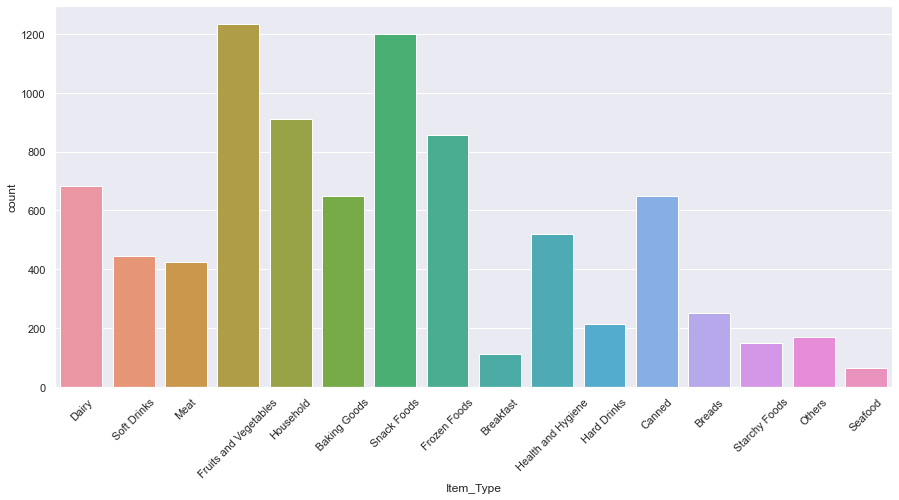

In [177]:
plt.figure(figsize=(15,7))             # increasing the size of the plot
plt.xticks(rotation=45)                #rotating the xlabels by 45 degree
sns.countplot(bigmart_df['Item_Type'])

###### Most sold items are 'Fruits and Vegetables'

In [178]:
#4. Outlet_Identifier
bigmart_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

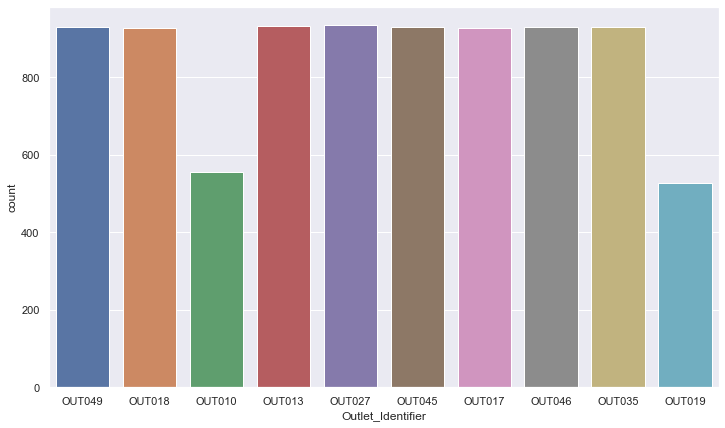

In [179]:
plt.figure(figsize=(12,7))
sns.countplot(bigmart_df['Outlet_Identifier'])

###### Most Active 'Outlet_Identifier' is 'OUT027' followed by 'OUT013'

In [180]:
#5. Outlet_Size
bigmart_df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

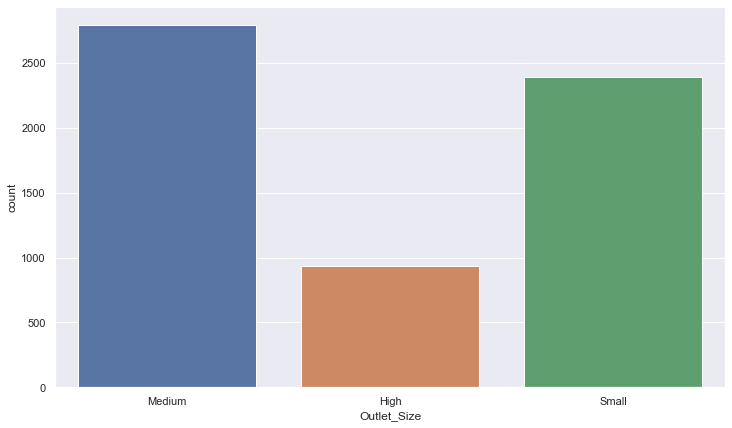

In [181]:
plt.figure(figsize=(12,7))
sns.countplot(bigmart_df['Outlet_Size'])

###### The number of 'Medium' size outlets are maximum. And number of 'High' size outlets are only 932

In [182]:
#6. Outlet_Location_Type
bigmart_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

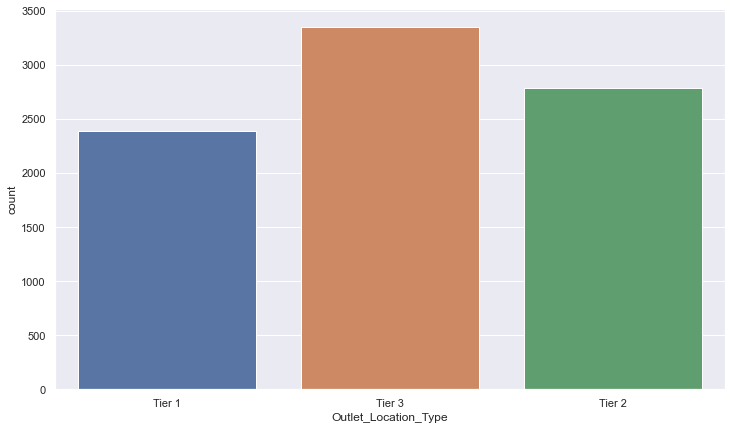

In [183]:
plt.figure(figsize=(12,7))
sns.countplot(bigmart_df['Outlet_Location_Type'])

###### Maximum number of outlets are in 'Tier 3' cities

In [184]:
#7. Outlet_Type
bigmart_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

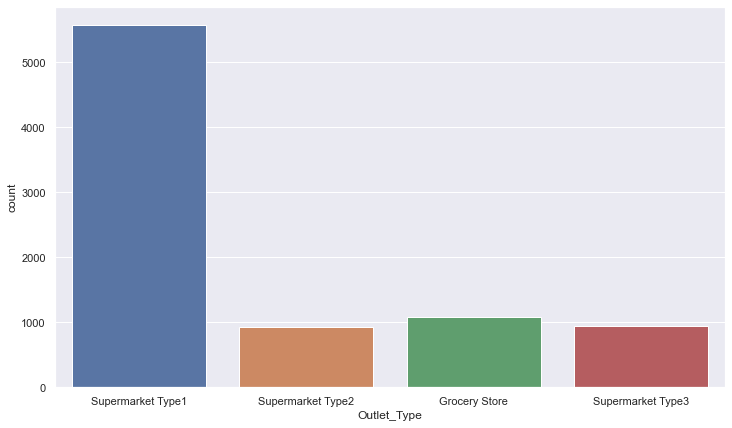

In [185]:
plt.figure(figsize=(12,7))
sns.countplot(bigmart_df['Outlet_Type'])

###### The maximum number of 'Oulet_Types' are of 'Supermarket Type1'

In [186]:
bigmart_df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

F:\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

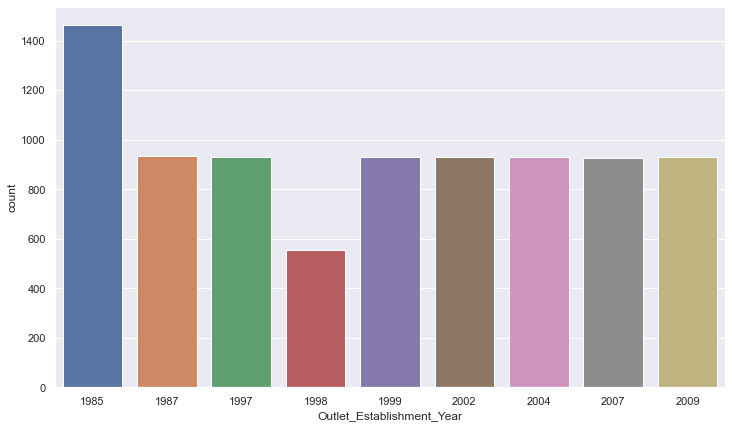

In [187]:
plt.figure(figsize=(12,7))
sns.countplot(bigmart_df['Outlet_Establishment_Year'])

###### Maximum outlets were established in year 1985 

In [188]:
bigmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 2. Continuous Variables
- Item_Weight
- Item_Visibility
- Item_MRP
    - Item_Outlet_Sales    ----->>> (target variable)

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

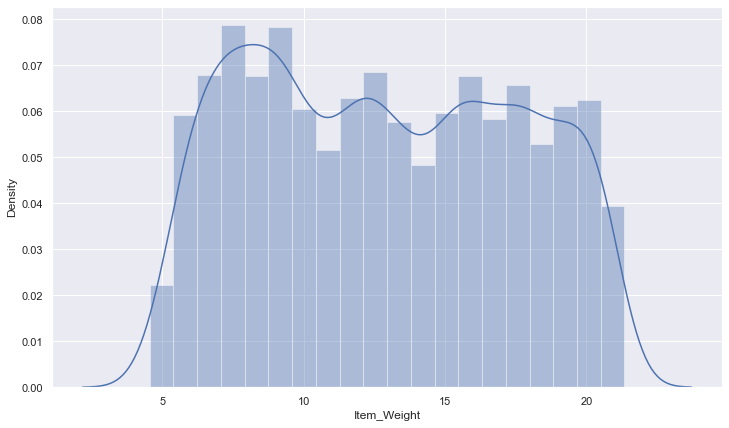

In [189]:
#1. Item_Weight
plt.figure(figsize=(12,7))
sns.distplot(bigmart_df['Item_Weight'])

###### Maximum item_weight density Distribution can be seen in the range of 5 to 10

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

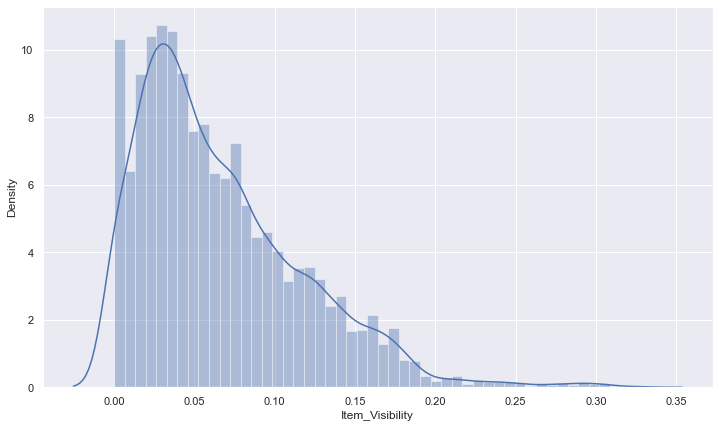

In [190]:
#2. Item_Visibility
plt.figure(figsize=(12,7))
sns.distplot(bigmart_df['Item_Visibility'])

###### Maximum density for 'item_Visibility' can be seen in the range of 0.00 to 0.10 ( near 0.05 )

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

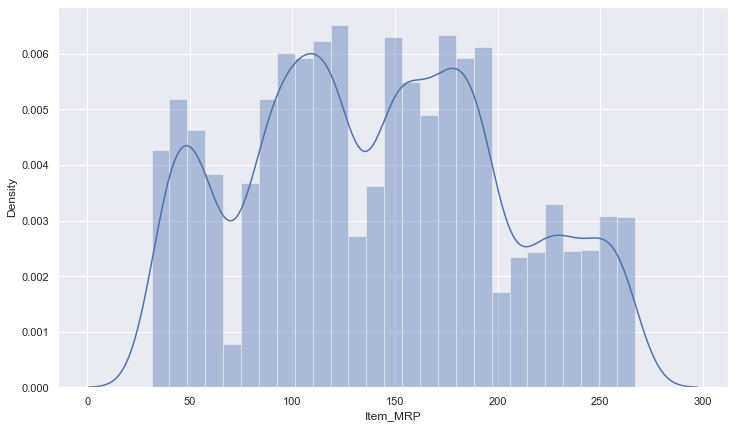

In [191]:
#3. Item_MRP
plt.figure(figsize=(12,7))
sns.distplot(bigmart_df['Item_MRP'])

###### Maximum number of items have MRP near to 100, the in then range of 150-200 and also we have significant items near the MRP of 50

F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

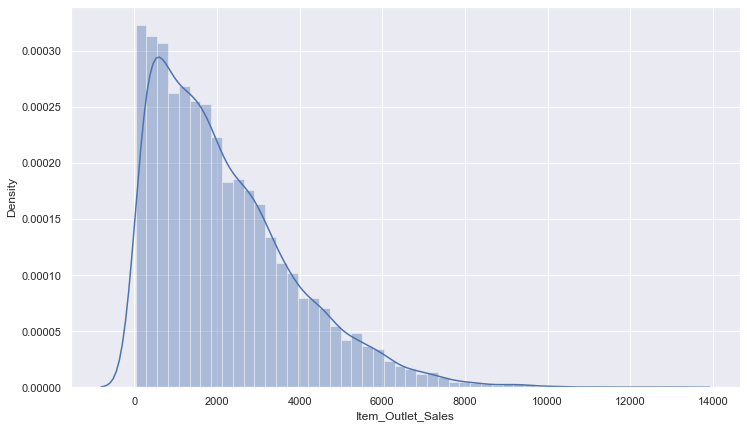

In [192]:
#4. Item_Outlet_Sales          ----->>>> This is the target variable
plt.figure(figsize=(12,7))
sns.distplot(bigmart_df['Item_Outlet_Sales'] )

###### Most of the outlets have 'Item_Outlet_Sales' between 0 and 2000

## B). Bivariate Analysis 

###### We can find the relation of each Feature with other variable using correlation

<AxesSubplot:>

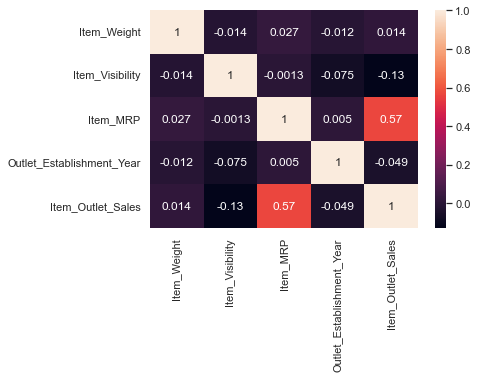

In [193]:
correlation = bigmart_df.corr()           #finding correlation
sns.heatmap(correlation, annot=True)

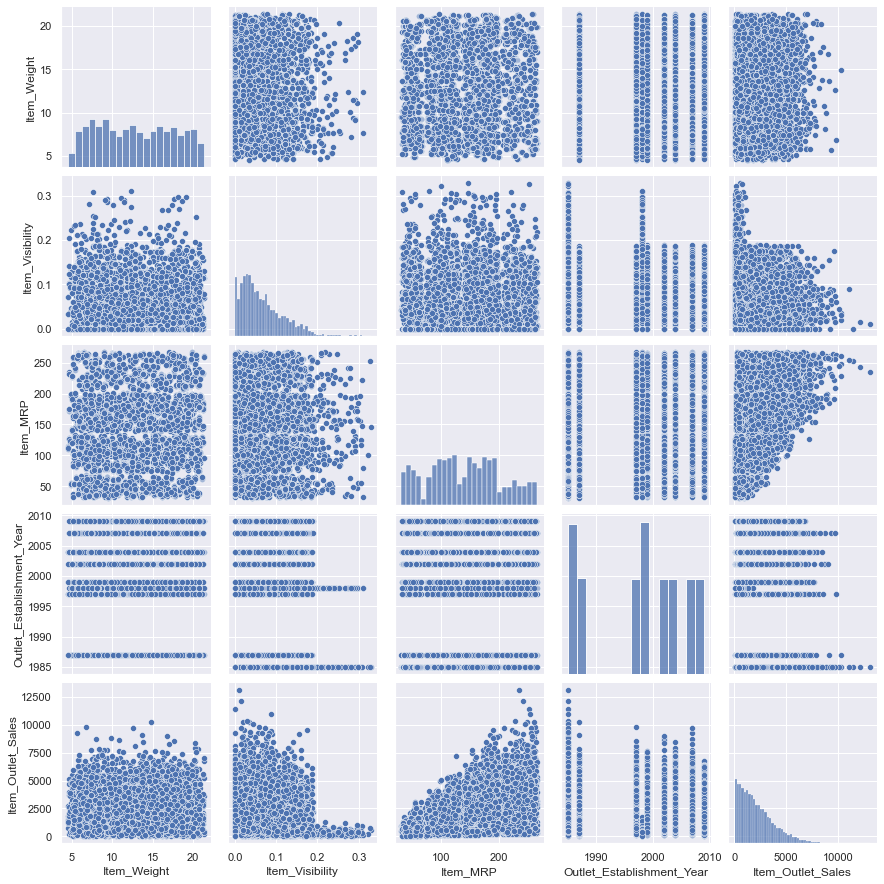

In [194]:
sns.pairplot(bigmart_df)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Fat_Content'>

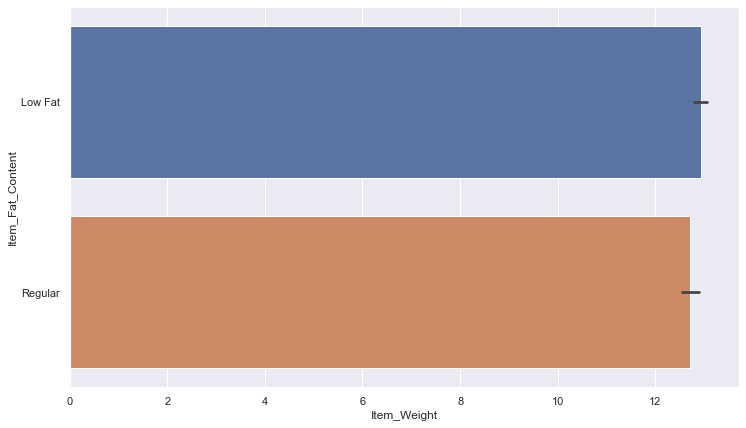

In [195]:
# categorical values
plt.figure(figsize=(12,7))
sns.barplot(y='Item_Fat_Content',x='Item_Weight', data=bigmart_df)

## Null Values Treatment

In [196]:
bigmart_df.isnull().sum()    #getting the count of null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### We can replace Null values of 'Item_Weight' by Mean

In [197]:
mean_value = bigmart_df['Item_Weight'].mean()
mean_value

12.857645184136183

In [198]:
bigmart_df['Item_Weight'].fillna(value = mean_value, inplace=True)

In [199]:
bigmart_df.isnull().sum() 

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### We can replace Null values of 'Outlet_Size' by its Mode

In [200]:
bigmart_df['Outlet_Size'].mode()

0    Medium
dtype: object

#### Replacing with mode 

In [201]:
bigmart_df['Outlet_Size'].fillna(value='Medium', inplace=True)

## OR

In [202]:
# filling the missing values in "Outlet_Size" column with Mode
# mode_of_Outlet_size = bigmart_df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [203]:
# print(mode_of_Outlet_size)

In [204]:
# miss_values = bigmart_df['Outlet_Size'].isnull()   

In [205]:
# print(miss_values)

In [206]:
# bigmart_df.loc[miss_values, 'Outlet_Size'] = bigmart_df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [207]:
# checking for missing values
bigmart_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## Label encoding

In [208]:
from sklearn.preprocessing import LabelEncoder

In [209]:
encoder = LabelEncoder()

In [210]:
bigmart_df['Item_Identifier']= encoder.fit_transform(bigmart_df['Item_Identifier'])

bigmart_df['Item_Fat_Content']= encoder.fit_transform(bigmart_df['Item_Fat_Content'])

bigmart_df['Item_Type']= encoder.fit_transform(bigmart_df['Item_Type'])

bigmart_df['Outlet_Identifier']= encoder.fit_transform(bigmart_df['Outlet_Identifier'])

bigmart_df['Outlet_Size']= encoder.fit_transform(bigmart_df['Outlet_Size'])

bigmart_df['Outlet_Location_Type']= encoder.fit_transform(bigmart_df['Outlet_Location_Type'])

bigmart_df['Outlet_Type']= encoder.fit_transform(bigmart_df['Outlet_Type'])

In [211]:
 bigmart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Separating Predictors and Target variable

In [212]:
X = bigmart_df.drop(columns='Item_Outlet_Sales')
y = bigmart_df['Item_Outlet_Sales']

## Train Test Split

In [213]:
from sklearn.model_selection import train_test_split

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [215]:
print(X_train.shape, X_test.shape)

(6818, 11) (1705, 11)


## Imorting Model and Metrices

# 1. XGBRegressor

In [216]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

## Fitting data into model

In [217]:
reg = XGBRegressor()
reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

#### making predictions for train and test data

In [218]:
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

#### Checking accuracy 

In [219]:
train_score = r2_score(y_train, train_pred)
test_score = r2_score(y_test, test_pred)

In [220]:
print(" Train data r2_score is:",train_score)
print(" Test data r2_score is:",test_score)

 Train data r2_score is: 0.8549833167058186
 Test data r2_score is: 0.5191234777241828


# 2. Linear Regression

In [221]:
from sklearn.linear_model import LinearRegression


In [222]:
lin_reg = LinearRegression()

In [223]:
# fitting the data into model
lin_reg.fit(X_train, y_train)

LinearRegression()

In [224]:
## making predictions
lin_reg_predict_train = lin_reg.predict(X_train)
lin_reg_predict_test = lin_reg.predict(X_test)

In [225]:
# accuracy of model
lin_reg_train_score = r2_score(y_train, lin_reg_predict_train)
lin_reg_test_score = r2_score(y_test, lin_reg_predict_test)

In [226]:
print("The train Score is:",lin_reg_train_score)
print("The test score is:", lin_reg_test_score)

The train Score is: 0.514058329918831
The test score is: 0.49498230467978976


# 3. Decision Tree

In [227]:
from sklearn.tree import DecisionTreeRegressor

In [228]:
DT_reg = DecisionTreeRegressor()

In [229]:
# fitting the data into model
DT_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [230]:
# predicting the values from model
DT_train_predict = DT_reg.predict(X_train)
DT_test_predict = DT_reg.predict(X_test)

In [231]:
# checking the accuracy score of the model
DT_train_score = r2_score(y_train, DT_train_predict)
DT_test_score = r2_score(y_test, DT_test_predict)

In [232]:
print("The train Score is:",DT_train_score)
print("The test score is:", DT_test_score)

The train Score is: 1.0
The test score is: 0.19869300613922802


# 4. Random Forest

In [233]:
from sklearn.ensemble import RandomForestRegressor  

In [234]:
RF_reg = RandomForestRegressor()

In [235]:
# fitting the data to model
RF_reg.fit(X_train, y_train)

RandomForestRegressor()

In [236]:
# predicting the values by model
RF_train_predict = RF_reg.predict(X_train)
RF_test_predict = RF_reg.predict(X_test)

In [237]:
# checking accuracy of the model
RF_train_score = r2_score(y_train, RF_train_predict)
RF_test_score = r2_score(y_test, RF_test_predict)

In [238]:
print("The train Score is:",RF_train_score)
print("The test score is:", RF_test_score)

The train Score is: 0.9386533708261903
The test score is: 0.5541213618515226
